In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/Bengaluru_House_Data.csv')

In [ ]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
data.isnull().mean()

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
#graphique

<BarContainer object of 7496 artists>

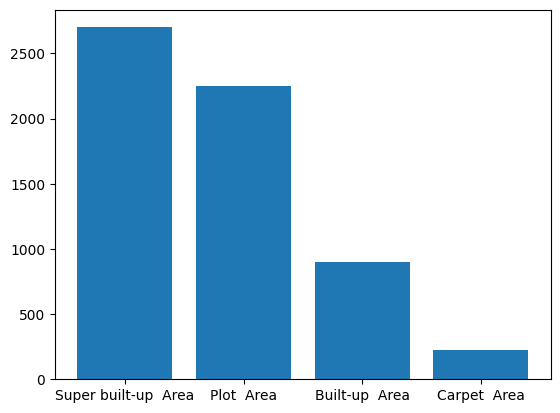

In [ ]:
plt.bar(data['area_type'],data['price'])

<BarContainer object of 7496 artists>

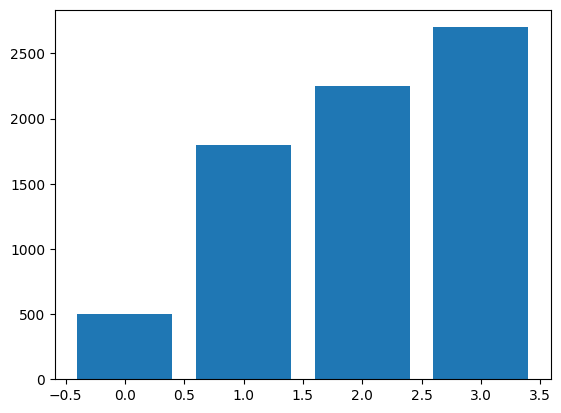

In [ ]:
plt.bar(data['balcony'],data['price'])

In [ ]:
#model

In [ ]:
from pycaret.regression import *
s = setup(data,target='price', session_id=123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(7496, 9)"
4,Transformed data shape,"(7496, 25)"
5,Transformed train set shape,"(5247, 25)"
6,Transformed test set shape,"(2249, 25)"
7,Numeric features,2
8,Categorical features,6
9,Preprocess,True


In [ ]:
s = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,25.5427,5431.8952,69.1473,0.5224,0.3602,0.2709,1.4740
huber,Huber Regressor,30.4874,5492.4277,69.8583,0.5140,0.4596,0.3429,0.2980
catboost,CatBoost Regressor,26.1220,5548.6462,69.8861,0.5123,0.3600,0.2743,2.7320
gbr,Gradient Boosting Regressor,27.3424,5595.6985,70.0663,0.5106,0.3707,0.2981,0.8180
xgboost,Extreme Gradient Boosting,26.1451,5571.6525,70.1966,0.5070,0.3630,0.2736,0.4330
lightgbm,Light Gradient Boosting Machine,26.8905,5620.2811,70.3131,0.5052,0.3793,0.2897,0.8160
lr,Linear Regression,36.4829,5622.7809,71.1293,0.4927,0.6141,0.4942,1.0420
ridge,Ridge Regression,36.4969,5629.0374,71.1555,0.4924,0.6146,0.4946,0.1550
br,Bayesian Ridge,36.5197,5640.3217,71.2161,0.4916,0.6132,0.4951,0.2700
rf,Random Forest Regressor,26.9377,5873.1253,72.1521,0.4790,0.3807,0.2862,1.9590


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.6791,7886.1246,88.8039,0.3613,0.5581,0.4759
1,35.2140,3666.3926,60.5507,0.5728,0.5423,0.4962
2,42.4185,17925.5547,133.8863,0.2979,0.6708,0.4405
3,33.4548,3029.3540,55.0396,0.5496,0.5227,0.4774
4,40.8184,6325.4704,79.5328,0.4686,0.6323,0.5135
5,34.2091,3410.6088,58.4004,0.5870,0.7336,0.5264
6,35.1961,3159.6133,56.2104,0.5662,0.6602,0.4894
7,36.5540,3455.4634,58.7832,0.5119,0.6299,0.5480
8,33.7742,2613.9941,51.1272,0.5851,0.5779,0.4891


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

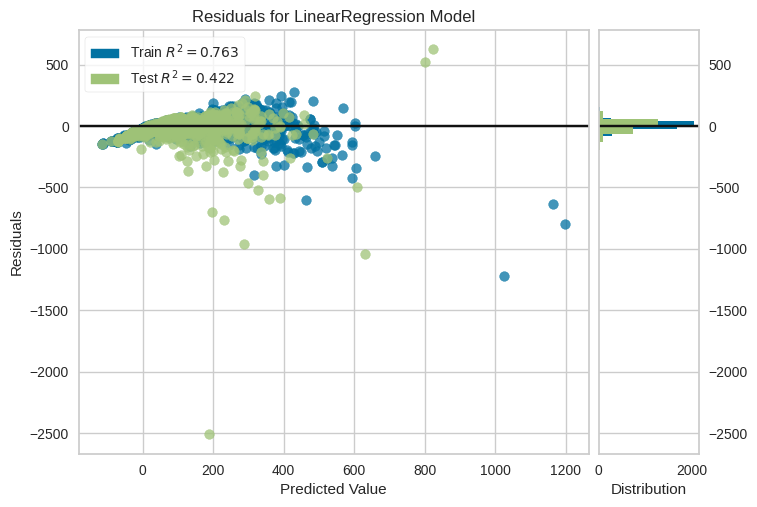

In [ ]:
plot_model(model, plot='residuals')

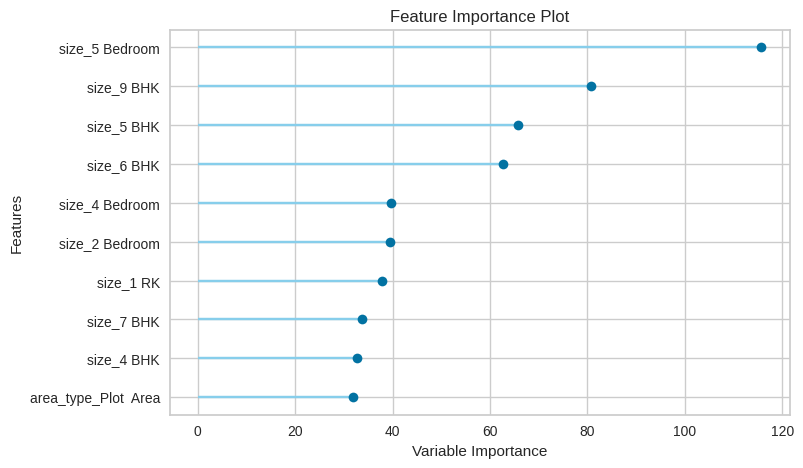

In [ ]:
plot_model(model, plot='feature')

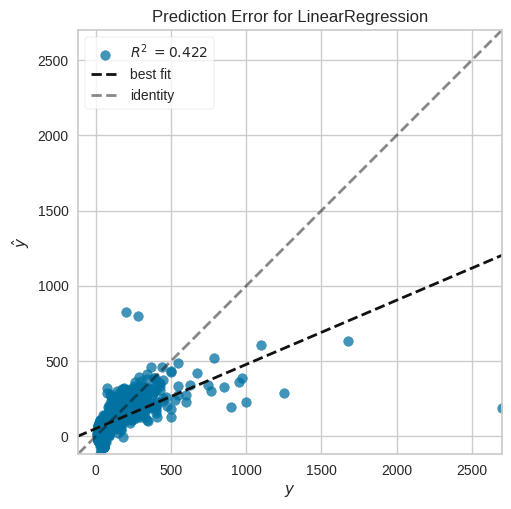

In [ ]:
plot_model(model, plot='error')

In [ ]:
prediction = predict_model(model, data=data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,31.6545,3972.9281,63.0312,0.6422,0.5952,0.4388


In [ ]:
new_data = data.copy().drop('price',axis=1)
prediction = predict_model(model, data=new_data)

In [ ]:
prediction

,area_type,availability,location,size,society,total_sqft,bath,balcony,prediction_label
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,69.215254
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,249.447808
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,113.131145
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,56.719965
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,270.265312
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,61.004220
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,115.474195
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,300.908083
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,72.023107


In [ ]:
create_app(model)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2524148a6bcc734b68.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
